<a href="https://colab.research.google.com/github/Prathamgupta19/pratham/blob/main/sih_aqi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [436]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse


In [317]:
data1 = pd.read_csv('/content/deli_aqi_date.zip')
data2 = pd.read_csv('/content/delhi_aqi_weather.zip')
data3 = pd.read_csv('/content/archive (1).zip')

In [318]:
data1.head()


,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [319]:

data1.tail()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
18771,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
18772,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
18773,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
18774,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47
18775,2023-01-24 08:00:00,1134.87,8.61,56.89,80.11,110.63,123.76,140.26,5.51


In [320]:
data1['datetime'] = pd.to_datetime(data1['date'])
data1['Date_1'] = data1['datetime'].dt.date
data1['year'] = data1['datetime'].dt.year
data1['month'] = data1['datetime'].dt.month
data1['Day'] = data1['datetime'].dt.day
data1['Weekday'] = data1['datetime'].dt.day_name()   # Converting the 'date' column to datetime
data1['hour'] = data1['datetime'].dt.hour          # Extracting the hour

data1.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,datetime,Date_1,year,month,Day,Weekday,hour
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,2020-11-25 01:00:00,2020-11-25,2020,11,25,Wednesday,1
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,2020-11-25 02:00:00,2020-11-25,2020,11,25,Wednesday,2
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,2020-11-25 03:00:00,2020-11-25,2020,11,25,Wednesday,3
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,2020-11-25 04:00:00,2020-11-25,2020,11,25,Wednesday,4
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,2020-11-25 05:00:00,2020-11-25,2020,11,25,Wednesday,5


In [321]:
def season_creation(x):
    if x in [2,3,4]:
        season = "Spring"
    elif x in [5,6]:
        season = "Summer"
    elif x in [7,8]:
        season = "Monsoon"
    elif x in [9,10]:
        season = "Autumn"
    elif x in[11,12,1]:
        season = "Winter"
    return season


In [322]:
data1["Season"] = data1["month"].apply(season_creation)
data1.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,datetime,Date_1,year,month,Day,Weekday,hour,Season
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,2020-11-25 01:00:00,2020-11-25,2020,11,25,Wednesday,1,Winter
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,2020-11-25 02:00:00,2020-11-25,2020,11,25,Wednesday,2,Winter
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,2020-11-25 03:00:00,2020-11-25,2020,11,25,Wednesday,3,Winter
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,2020-11-25 04:00:00,2020-11-25,2020,11,25,Wednesday,4,Winter
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,2020-11-25 05:00:00,2020-11-25,2020,11,25,Wednesday,5,Winter


In [323]:
data4 = data1.groupby('Date_1')[['co','no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']].mean().reset_index()
data4.head()
data4['Date'] = pd.to_datetime(data4['Date_1'])
data4.info()
print(type('Date'))
data4['year'] = data4['Date'].dt.year
data4['month'] = data4['Date'].dt.month
data4['Day'] = data4['Date'].dt.day
data4['Weekday'] = data4['Date'].dt.day_name()   # Converting the 'date' column to datetime
       # Extracting the hour
data4.drop(['Date_1'],axis=1,inplace=True)
data4["Season"] = data4["month"].apply(season_creation)
data1.head()
data4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date_1  789 non-null    object        
 1   co      789 non-null    float64       
 2   no      789 non-null    float64       
 3   no2     789 non-null    float64       
 4   o3      789 non-null    float64       
 5   so2     789 non-null    float64       
 6   pm2_5   789 non-null    float64       
 7   pm10    789 non-null    float64       
 8   nh3     789 non-null    float64       
 9   Date    789 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 61.8+ KB
<class 'str'>


,co,no,no2,o3,so2,pm2_5,pm10,nh3,Date,year,month,Day,Weekday,Season
0,2971.566087,14.880000,93.549130,26.791304,82.430870,342.301739,405.037826,26.720435,2020-11-25,2020,11,25,Wednesday,Winter
1,2314.806667,24.443750,65.418750,20.753333,65.158333,180.754167,226.001250,21.993750,2020-11-26,2020,11,26,Thursday,Winter
2,1592.159583,4.934167,56.221667,43.925000,41.485000,115.901667,143.952500,20.280000,2020-11-27,2020,11,27,Friday,Winter
3,2461.115833,11.879583,70.046667,50.372500,41.515417,197.889167,234.861250,23.145000,2020-11-28,2020,11,28,Saturday,Winter
4,4516.680417,65.719583,93.949583,34.696250,77.785417,329.381667,404.049583,47.233750,2020-11-29,2020,11,29,Sunday,Winter


In [324]:
data4.tail()

,co,no,no2,o3,so2,pm2_5,pm10,nh3,Date,year,month,Day,Weekday,Season
784,2770.979583,25.315000,64.618750,27.460833,55.958333,265.761667,318.207083,19.518750,2023-01-20,2023,1,20,Friday,Winter
785,2263.070000,12.883750,66.103750,25.228333,57.868750,245.029583,320.232083,21.341667,2023-01-21,2023,1,21,Saturday,Winter
786,1404.961250,6.172917,33.536667,27.261667,22.238333,162.943333,216.407083,15.687500,2023-01-22,2023,1,22,Sunday,Winter
787,4799.564583,81.782500,77.383750,26.542083,66.191667,409.547083,522.370417,36.840417,2023-01-23,2023,1,23,Monday,Winter
788,1938.926667,9.371111,46.724444,32.718889,45.672222,251.776667,305.728889,7.360000,2023-01-24,2023,1,24,Tuesday,Winter


In [325]:
data2.head()

,Unnamed: 0,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [326]:

data2.drop(['Unnamed: 0'],axis=1,inplace=True)
data2.columns= ['avg temp','max temp','min temp','pressure','humidity','visibility' ,'avg wind speed','max wind speed' , 'aqi']
mean_value = data2['aqi'].mean()
data2['aqi'] = data2['aqi'].fillna(mean_value)
data2.head()

,avg temp,max temp,min temp,pressure,humidity,visibility,avg wind speed,max wind speed,aqi
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [327]:

X = data2['aqi']
Y = data2['visibility']
print(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
model = XGBRegressor()
model.fit(X_train, y_train)
test_pred = model.predict(X_test)
mean_abs_error = mae(y_test, test_pred)
print(mean_abs_error)

0       219.720833
1       182.187500
2       154.037500
3       223.208333
4       200.645833
           ...    
1088    288.416667
1089    256.833333
1090    169.000000
1091    186.041667
1092    185.583333
Name: aqi, Length: 1093, dtype: float64 0       0.5
1       0.6
2       0.6
3       0.8
4       1.3
       ... 
1088    1.8
1089    2.3
1090    0.6
1091    1.1
1092    1.3
Name: visibility, Length: 1093, dtype: float64
0.46049523135842807


In [328]:
p = data4['pm2_5']
P = np.array(p)
visibility_pred = model.predict(P.reshape(-1, 1))
data4['visibility'] = visibility_pred
data4.head()


,co,no,no2,o3,so2,pm2_5,pm10,nh3,Date,year,month,Day,Weekday,Season,visibility
0,2971.566087,14.880000,93.549130,26.791304,82.430870,342.301739,405.037826,26.720435,2020-11-25,2020,11,25,Wednesday,Winter,1.705225
1,2314.806667,24.443750,65.418750,20.753333,65.158333,180.754167,226.001250,21.993750,2020-11-26,2020,11,26,Thursday,Winter,1.383714
2,1592.159583,4.934167,56.221667,43.925000,41.485000,115.901667,143.952500,20.280000,2020-11-27,2020,11,27,Friday,Winter,2.094234
3,2461.115833,11.879583,70.046667,50.372500,41.515417,197.889167,234.861250,23.145000,2020-11-28,2020,11,28,Saturday,Winter,1.260093
4,4516.680417,65.719583,93.949583,34.696250,77.785417,329.381667,404.049583,47.233750,2020-11-29,2020,11,29,Sunday,Winter,0.805532


In [329]:
specific_date = '2021-11-11'
readings = data4[data4['Date'] == specific_date]
print(readings)

              co         no         no2       o3        so2       pm2_5  \
351  6248.474167  52.347083  115.699167  82.5175  80.345833  538.658333   

         pm10       nh3       Date  year  month  Day   Weekday  Season  \
351  652.2575  41.24875 2021-11-11  2021     11   11  Thursday  Winter   

     visibility  
351    1.587143  


In [330]:
def calculate_value1(pm10):
    if isinstance(pm10, str):  # Check if pm2_5 is a string
        return 0
    elif pm10 <= 50:
        return pm10 # Assuming c8 is pm2_5 itself (or replace with the correct value)
    elif 50 < pm10 <= 100:
        return pm10  # Assuming c8 is pm2_5 itself (or replace with the correct value)
    elif 100 < pm10 <= 250:
        return 100 + (pm10 - 100) * 100 / 150
    elif 250 < pm10 <= 350:
        return 200 + (pm10 - 250)
    elif 350 < pm10 <= 430:
        return 300 + (pm10 - 350) * (100 / 80)
    elif pm10 > 430:
        return 400 + (pm10 - 430) * (100 / 80)
data4['pm10_sub_index'] = data4['pm10'].apply(calculate_value1)
data4.head()

,co,no,no2,o3,so2,pm2_5,pm10,nh3,Date,year,month,Day,Weekday,Season,visibility,pm10_sub_index
0,2971.566087,14.880000,93.549130,26.791304,82.430870,342.301739,405.037826,26.720435,2020-11-25,2020,11,25,Wednesday,Winter,1.705225,368.797283
1,2314.806667,24.443750,65.418750,20.753333,65.158333,180.754167,226.001250,21.993750,2020-11-26,2020,11,26,Thursday,Winter,1.383714,184.000833
2,1592.159583,4.934167,56.221667,43.925000,41.485000,115.901667,143.952500,20.280000,2020-11-27,2020,11,27,Friday,Winter,2.094234,129.301667
3,2461.115833,11.879583,70.046667,50.372500,41.515417,197.889167,234.861250,23.145000,2020-11-28,2020,11,28,Saturday,Winter,1.260093,189.907500
4,4516.680417,65.719583,93.949583,34.696250,77.785417,329.381667,404.049583,47.233750,2020-11-29,2020,11,29,Sunday,Winter,0.805532,367.561979


In [331]:
def calculate_value2(pm2_5):
    if isinstance(pm2_5, str):  # Equivalent to ISTEXT in Excel
        return 0
    elif pm2_5 <= 30:
        return pm2_5 * 50 / 30
    elif 30 < pm2_5 <= 60:
        return 50 + (pm2_5 - 30) * 50 / 30
    elif 60 < pm2_5 <= 90:
        return 100 + (pm2_5 - 60) * 100 / 30
    elif 90 < pm2_5 <= 120:
        return 200 + (pm2_5 - 90) * (100 / 30)
    elif 120 < pm2_5 <= 250:
        return 300 + (pm2_5 - 120) * (100 / 130)
    elif pm2_5 > 250:
        return 400 + (pm2_5 - 250) * (100 / 130)
data4['pm2.5_sub_index'] = data4['pm2_5'].apply(calculate_value2)
data4.head()

,co,no,no2,o3,so2,pm2_5,pm10,nh3,Date,year,month,Day,Weekday,Season,visibility,pm10_sub_index,pm2.5_sub_index
0,2971.566087,14.880000,93.549130,26.791304,82.430870,342.301739,405.037826,26.720435,2020-11-25,2020,11,25,Wednesday,Winter,1.705225,368.797283,471.001338
1,2314.806667,24.443750,65.418750,20.753333,65.158333,180.754167,226.001250,21.993750,2020-11-26,2020,11,26,Thursday,Winter,1.383714,184.000833,346.733974
2,1592.159583,4.934167,56.221667,43.925000,41.485000,115.901667,143.952500,20.280000,2020-11-27,2020,11,27,Friday,Winter,2.094234,129.301667,286.338889
3,2461.115833,11.879583,70.046667,50.372500,41.515417,197.889167,234.861250,23.145000,2020-11-28,2020,11,28,Saturday,Winter,1.260093,189.907500,359.914744
4,4516.680417,65.719583,93.949583,34.696250,77.785417,329.381667,404.049583,47.233750,2020-11-29,2020,11,29,Sunday,Winter,0.805532,367.561979,461.062821


In [332]:
def calculate_value3(c12):
    if isinstance(c12, str):  # Equivalent to ISTEXT in Excel
        return 0
    elif c12 <= 40:
        return c12 * 50 / 40
    elif 40 < c12 <= 80:
        return 50 + (c12 - 40) * 50 / 40
    elif 80 < c12 <= 380:
        return 100 + (c12 - 80) * 100 / 300
    elif 380 < c12 <= 800:
        return 200 + (c12 - 380) * (100 / 420)
    elif 800 < c12 <= 1600:
        return 300 + (c12 - 800) * (100 / 800)
    elif c12 > 1600:
        return 400 + (c12 - 1600) * (100 / 800)
data4['pm_so2_sub_index'] = data4['so2'].apply(calculate_value3)
data4.head()

,co,no,no2,o3,so2,pm2_5,pm10,nh3,Date,year,month,Day,Weekday,Season,visibility,pm10_sub_index,pm2.5_sub_index,pm_so2_sub_index
0,2971.566087,14.880000,93.549130,26.791304,82.430870,342.301739,405.037826,26.720435,2020-11-25,2020,11,25,Wednesday,Winter,1.705225,368.797283,471.001338,100.810290
1,2314.806667,24.443750,65.418750,20.753333,65.158333,180.754167,226.001250,21.993750,2020-11-26,2020,11,26,Thursday,Winter,1.383714,184.000833,346.733974,81.447917
2,1592.159583,4.934167,56.221667,43.925000,41.485000,115.901667,143.952500,20.280000,2020-11-27,2020,11,27,Friday,Winter,2.094234,129.301667,286.338889,51.856250
3,2461.115833,11.879583,70.046667,50.372500,41.515417,197.889167,234.861250,23.145000,2020-11-28,2020,11,28,Saturday,Winter,1.260093,189.907500,359.914744,51.894271
4,4516.680417,65.719583,93.949583,34.696250,77.785417,329.381667,404.049583,47.233750,2020-11-29,2020,11,29,Sunday,Winter,0.805532,367.561979,461.062821,97.231771


In [333]:
def calculate_value4(c14):
    if isinstance(c14, str):  # Equivalent to ISTEXT in Excel
        return 0
    elif c14 <= 40:
        return c14 * 50 / 40
    elif 40 < c14 <= 80:
        return 50 + (c14 - 40) * 50 / 40
    elif 80 < c14 <= 180:
        return 100 + (c14 - 80) * 100 / 100
    elif 180 < c14 <= 280:
        return 200 + (c14 - 180) * (100 / 100)
    elif 280 < c14 <= 400:
        return 300 + (c14 - 280) * (100 / 120)
    elif c14 > 400:
        return 400 + (c14 - 400) * (100 / 120)
data4['pm_no2_sub_index'] = data4['no2'].apply(calculate_value4)
data4.head()

,co,no,no2,o3,so2,pm2_5,pm10,nh3,Date,year,month,Day,Weekday,Season,visibility,pm10_sub_index,pm2.5_sub_index,pm_so2_sub_index,pm_no2_sub_index
0,2971.566087,14.880000,93.549130,26.791304,82.430870,342.301739,405.037826,26.720435,2020-11-25,2020,11,25,Wednesday,Winter,1.705225,368.797283,471.001338,100.810290,113.549130
1,2314.806667,24.443750,65.418750,20.753333,65.158333,180.754167,226.001250,21.993750,2020-11-26,2020,11,26,Thursday,Winter,1.383714,184.000833,346.733974,81.447917,81.773438
2,1592.159583,4.934167,56.221667,43.925000,41.485000,115.901667,143.952500,20.280000,2020-11-27,2020,11,27,Friday,Winter,2.094234,129.301667,286.338889,51.856250,70.277083
3,2461.115833,11.879583,70.046667,50.372500,41.515417,197.889167,234.861250,23.145000,2020-11-28,2020,11,28,Saturday,Winter,1.260093,189.907500,359.914744,51.894271,87.558333
4,4516.680417,65.719583,93.949583,34.696250,77.785417,329.381667,404.049583,47.233750,2020-11-29,2020,11,29,Sunday,Winter,0.805532,367.561979,461.062821,97.231771,113.949583


In [334]:
def calculate_value5(c16):
    if isinstance(c16, str):  # Equivalent to ISTEXT in Excel
        return 0
    elif c16/1000 <= 1:
        return c16/1000 * 50 / 1
    elif 1 < c16/1000 <= 2:
        return 50 + (c16/1000 - 1) * 50 / 1
    elif 2 < c16/1000 <= 10:
        return 100 + (c16/1000 - 2) * 100 / 8
    elif 10 < c16/1000 <= 17:
        return 200 + (c16/1000 - 10) * (100 / 7)
    elif 17 < c16/1000 <= 34:
        return 300 + (c16/1000 - 17) * (100 / 17)
    elif c16/1000 > 34:
        return 400 + (c16/1000 - 34) * (100 / 17)
data4['pm_co_sub_index'] = data4['co'].apply(calculate_value5)
data4.head()

,co,no,no2,o3,so2,pm2_5,pm10,nh3,Date,year,month,Day,Weekday,Season,visibility,pm10_sub_index,pm2.5_sub_index,pm_so2_sub_index,pm_no2_sub_index,pm_co_sub_index
0,2971.566087,14.880000,93.549130,26.791304,82.430870,342.301739,405.037826,26.720435,2020-11-25,2020,11,25,Wednesday,Winter,1.705225,368.797283,471.001338,100.810290,113.549130,112.144576
1,2314.806667,24.443750,65.418750,20.753333,65.158333,180.754167,226.001250,21.993750,2020-11-26,2020,11,26,Thursday,Winter,1.383714,184.000833,346.733974,81.447917,81.773438,103.935083
2,1592.159583,4.934167,56.221667,43.925000,41.485000,115.901667,143.952500,20.280000,2020-11-27,2020,11,27,Friday,Winter,2.094234,129.301667,286.338889,51.856250,70.277083,79.607979
3,2461.115833,11.879583,70.046667,50.372500,41.515417,197.889167,234.861250,23.145000,2020-11-28,2020,11,28,Saturday,Winter,1.260093,189.907500,359.914744,51.894271,87.558333,105.763948
4,4516.680417,65.719583,93.949583,34.696250,77.785417,329.381667,404.049583,47.233750,2020-11-29,2020,11,29,Sunday,Winter,0.805532,367.561979,461.062821,97.231771,113.949583,131.458505


In [335]:
def calculate_value6(c18):
    if isinstance(c18, str):  # Equivalent to ISTEXT in Excel
        return 0
    elif c18 <= 50:
        return c18 * 50 / 50
    elif 50 < c18 <= 100:
        return 50 + (c18 - 50) * 50 / 50
    elif 100 < c18 <= 168:
        return 100 + (c18 - 100) * 100 / 68
    elif 168 < c18 <= 208:
        return 200 + (c18 - 168) * (100 / 40)
    elif 208 < c18 <= 748:
        return 300 + (c18 - 208) * (100 / 539)
    elif c18 > 748:
        return 400 + (c18 - 748) * (100 / 539)
data4['pm_o3_sub_index'] = data4['o3'].apply(calculate_value6)
data4.head()

,co,no,no2,o3,so2,pm2_5,pm10,nh3,Date,year,...,Day,Weekday,Season,visibility,pm10_sub_index,pm2.5_sub_index,pm_so2_sub_index,pm_no2_sub_index,pm_co_sub_index,pm_o3_sub_index
0,2971.566087,14.880000,93.549130,26.791304,82.430870,342.301739,405.037826,26.720435,2020-11-25,2020,...,25,Wednesday,Winter,1.705225,368.797283,471.001338,100.810290,113.549130,112.144576,26.791304
1,2314.806667,24.443750,65.418750,20.753333,65.158333,180.754167,226.001250,21.993750,2020-11-26,2020,...,26,Thursday,Winter,1.383714,184.000833,346.733974,81.447917,81.773438,103.935083,20.753333
2,1592.159583,4.934167,56.221667,43.925000,41.485000,115.901667,143.952500,20.280000,2020-11-27,2020,...,27,Friday,Winter,2.094234,129.301667,286.338889,51.856250,70.277083,79.607979,43.925000
3,2461.115833,11.879583,70.046667,50.372500,41.515417,197.889167,234.861250,23.145000,2020-11-28,2020,...,28,Saturday,Winter,1.260093,189.907500,359.914744,51.894271,87.558333,105.763948,50.372500
4,4516.680417,65.719583,93.949583,34.696250,77.785417,329.381667,404.049583,47.233750,2020-11-29,2020,...,29,Sunday,Winter,0.805532,367.561979,461.062821,97.231771,113.949583,131.458505,34.696250


In [336]:
def calculate_value7(c20):
    if isinstance(c20, str):  # Equivalent to ISTEXT in Excel
        return 0
    elif c20 <= 200:
        return c20 * 50 / 200
    elif 200 < c20 <= 400:
        return 50 + (c20 - 200) * 50 / 200
    elif 400 < c20 <= 800:
        return 100 + (c20 - 400) * 100 / 400
    elif 800 < c20 <= 1200:
        return 200 + (c20 - 800) * (100 / 400)
    elif 1200 < c20 <= 1800:
        return 300 + (c20 - 1200) * (100 / 600)
    elif c20 > 1800:
        return 400 + (c20 - 1800) * (100 / 600)
data4['pm_nh3_sub_index'] = data4['nh3'].apply(calculate_value7)
data4.head()

,co,no,no2,o3,so2,pm2_5,pm10,nh3,Date,year,...,Weekday,Season,visibility,pm10_sub_index,pm2.5_sub_index,pm_so2_sub_index,pm_no2_sub_index,pm_co_sub_index,pm_o3_sub_index,pm_nh3_sub_index
0,2971.566087,14.880000,93.549130,26.791304,82.430870,342.301739,405.037826,26.720435,2020-11-25,2020,...,Wednesday,Winter,1.705225,368.797283,471.001338,100.810290,113.549130,112.144576,26.791304,6.680109
1,2314.806667,24.443750,65.418750,20.753333,65.158333,180.754167,226.001250,21.993750,2020-11-26,2020,...,Thursday,Winter,1.383714,184.000833,346.733974,81.447917,81.773438,103.935083,20.753333,5.498437
2,1592.159583,4.934167,56.221667,43.925000,41.485000,115.901667,143.952500,20.280000,2020-11-27,2020,...,Friday,Winter,2.094234,129.301667,286.338889,51.856250,70.277083,79.607979,43.925000,5.070000
3,2461.115833,11.879583,70.046667,50.372500,41.515417,197.889167,234.861250,23.145000,2020-11-28,2020,...,Saturday,Winter,1.260093,189.907500,359.914744,51.894271,87.558333,105.763948,50.372500,5.786250
4,4516.680417,65.719583,93.949583,34.696250,77.785417,329.381667,404.049583,47.233750,2020-11-29,2020,...,Sunday,Winter,0.805532,367.561979,461.062821,97.231771,113.949583,131.458505,34.696250,11.808437


In [337]:
print(data4.columns.tolist())
data4.columns = data4.columns.str.strip()
# Ensure all columns exist
required_columns = ['pm10_sub_index', 'pm2.5_sub_index', 'pm_so2_sub_index',
                    'pm_no2_sub_index', 'pm_co_sub_index', 'pm_o3_sub_index',
                    'pm_nh3_sub_index']

for col in required_columns:
    if col not in data4.columns:
        print(f"Column {col} is missing or incorrectly named!")


['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'Date', 'year', 'month', 'Day', 'Weekday', 'Season', 'visibility', 'pm10_sub_index', 'pm2.5_sub_index', 'pm_so2_sub_index', 'pm_no2_sub_index', 'pm_co_sub_index', 'pm_o3_sub_index', 'pm_nh3_sub_index']


In [338]:
data4.head()

,co,no,no2,o3,so2,pm2_5,pm10,nh3,Date,year,...,Weekday,Season,visibility,pm10_sub_index,pm2.5_sub_index,pm_so2_sub_index,pm_no2_sub_index,pm_co_sub_index,pm_o3_sub_index,pm_nh3_sub_index
0,2971.566087,14.880000,93.549130,26.791304,82.430870,342.301739,405.037826,26.720435,2020-11-25,2020,...,Wednesday,Winter,1.705225,368.797283,471.001338,100.810290,113.549130,112.144576,26.791304,6.680109
1,2314.806667,24.443750,65.418750,20.753333,65.158333,180.754167,226.001250,21.993750,2020-11-26,2020,...,Thursday,Winter,1.383714,184.000833,346.733974,81.447917,81.773438,103.935083,20.753333,5.498437
2,1592.159583,4.934167,56.221667,43.925000,41.485000,115.901667,143.952500,20.280000,2020-11-27,2020,...,Friday,Winter,2.094234,129.301667,286.338889,51.856250,70.277083,79.607979,43.925000,5.070000
3,2461.115833,11.879583,70.046667,50.372500,41.515417,197.889167,234.861250,23.145000,2020-11-28,2020,...,Saturday,Winter,1.260093,189.907500,359.914744,51.894271,87.558333,105.763948,50.372500,5.786250
4,4516.680417,65.719583,93.949583,34.696250,77.785417,329.381667,404.049583,47.233750,2020-11-29,2020,...,Sunday,Winter,0.805532,367.561979,461.062821,97.231771,113.949583,131.458505,34.696250,11.808437


In [339]:
def calculate_max_value(row):
    e8 = row['pm10_sub_index']
    e10 = row['pm2.5_sub_index']
    e12 = row['pm_so2_sub_index']
    e14 = row['pm_no2_sub_index']
    e16 = row['pm_co_sub_index']
    e18 = row['pm_o3_sub_index']
    e20 = row['pm_nh3_sub_index']
    d8 = row['pm10_sub_index']
    d10 = row['pm2.5_sub_index']
    d12 = row['pm_so2_sub_index']
    d14 = row['pm_no2_sub_index']
    d16 = row['pm_co_sub_index']
    d18 = row['pm_o3_sub_index']
    d20 = row['pm_nh3_sub_index']

    #if (e8 == 1 or e10 == 1) and (e8 + e10 + e12 + e14 + e16 + e18 + e20) >= 3:
    return max(d8, d10, d12, d14, d16, d18, d20)
     # Or any other default value if the condition is not met
data4['aqi'] = data4.apply(calculate_max_value, axis=1)
data4.head()

,co,no,no2,o3,so2,pm2_5,pm10,nh3,Date,year,...,Season,visibility,pm10_sub_index,pm2.5_sub_index,pm_so2_sub_index,pm_no2_sub_index,pm_co_sub_index,pm_o3_sub_index,pm_nh3_sub_index,aqi
0,2971.566087,14.880000,93.549130,26.791304,82.430870,342.301739,405.037826,26.720435,2020-11-25,2020,...,Winter,1.705225,368.797283,471.001338,100.810290,113.549130,112.144576,26.791304,6.680109,471.001338
1,2314.806667,24.443750,65.418750,20.753333,65.158333,180.754167,226.001250,21.993750,2020-11-26,2020,...,Winter,1.383714,184.000833,346.733974,81.447917,81.773438,103.935083,20.753333,5.498437,346.733974
2,1592.159583,4.934167,56.221667,43.925000,41.485000,115.901667,143.952500,20.280000,2020-11-27,2020,...,Winter,2.094234,129.301667,286.338889,51.856250,70.277083,79.607979,43.925000,5.070000,286.338889
3,2461.115833,11.879583,70.046667,50.372500,41.515417,197.889167,234.861250,23.145000,2020-11-28,2020,...,Winter,1.260093,189.907500,359.914744,51.894271,87.558333,105.763948,50.372500,5.786250,359.914744
4,4516.680417,65.719583,93.949583,34.696250,77.785417,329.381667,404.049583,47.233750,2020-11-29,2020,...,Winter,0.805532,367.561979,461.062821,97.231771,113.949583,131.458505,34.696250,11.808437,461.062821


In [340]:
data4.columns

Index(['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'Date', 'year',
       'month', 'Day', 'Weekday', 'Season', 'visibility', 'pm10_sub_index',
       'pm2.5_sub_index', 'pm_so2_sub_index', 'pm_no2_sub_index',
       'pm_co_sub_index', 'pm_o3_sub_index', 'pm_nh3_sub_index', 'aqi'],
      dtype='object')

In [341]:
data7 = data4[['Date','aqi', 'visibility', 'Season' ,'year', 'month', 'Day', 'Weekday']]
data7.head()

,Date,aqi,visibility,Season,year,month,Day,Weekday
0,2020-11-25,471.001338,1.705225,Winter,2020,11,25,Wednesday
1,2020-11-26,346.733974,1.383714,Winter,2020,11,26,Thursday
2,2020-11-27,286.338889,2.094234,Winter,2020,11,27,Friday
3,2020-11-28,359.914744,1.260093,Winter,2020,11,28,Saturday
4,2020-11-29,461.062821,0.805532,Winter,2020,11,29,Sunday


In [342]:
data3.head()

,Date,Year,Month,Max Temperature,Avg Temperature,Min Temperature,Max Dew Point,Avg Dew Point,Min Dew Point,Max Humidity,Avg Humidity,Min Humidity,Max Wind Speed,Avg Wind Speed,Min Wind Speed,Max Pressure,Avg Pressure,Min Pressure,Total Precipitation
0,1,2010,1,70.0,55.7,45.0,52.0,47.5,41.0,100.0,77.5,43.0,8.0,4.9,0.0,29.2,29.2,29.1,0.0
1,2,2010,1,59.0,50.6,46.0,54.0,49.6,46.0,100.0,96.7,77.0,8.0,4.8,3.0,29.3,29.3,29.2,0.0
2,3,2010,1,57.0,52.8,48.0,57.0,52.1,48.0,100.0,97.3,82.0,12.0,7.4,3.0,29.3,29.2,29.2,0.0
3,4,2010,1,55.0,51.0,48.0,50.0,48.4,48.0,100.0,91.9,77.0,15.0,11.0,7.0,29.3,29.2,29.1,0.0
4,5,2010,1,63.0,53.1,46.0,52.0,47.9,46.0,100.0,85.1,55.0,14.0,5.7,0.0,29.2,29.1,29.1,0.0


In [344]:
data3.head()

,Date,Year,Month,Max Temperature,Avg Temperature,Min Temperature,Max Dew Point,Avg Dew Point,Min Dew Point,Max Humidity,Avg Humidity,Min Humidity,Max Wind Speed,Avg Wind Speed,Min Wind Speed,Max Pressure,Avg Pressure,Min Pressure,Total Precipitation,date
0,2010-01-01,2010,1,70.0,55.7,45.0,52.0,47.5,41.0,100.0,77.5,43.0,8.0,4.9,0.0,29.2,29.2,29.1,0.0,2010-01-01
1,2010-01-02,2010,1,59.0,50.6,46.0,54.0,49.6,46.0,100.0,96.7,77.0,8.0,4.8,3.0,29.3,29.3,29.2,0.0,2010-01-02
2,2010-01-03,2010,1,57.0,52.8,48.0,57.0,52.1,48.0,100.0,97.3,82.0,12.0,7.4,3.0,29.3,29.2,29.2,0.0,2010-01-03
3,2010-01-04,2010,1,55.0,51.0,48.0,50.0,48.4,48.0,100.0,91.9,77.0,15.0,11.0,7.0,29.3,29.2,29.1,0.0,2010-01-04
4,2010-01-05,2010,1,63.0,53.1,46.0,52.0,47.9,46.0,100.0,85.1,55.0,14.0,5.7,0.0,29.2,29.1,29.1,0.0,2010-01-05


In [345]:
data3.drop(['Year','Month','date'],axis=1,inplace=True)
data3.head()

,Date,Max Temperature,Avg Temperature,Min Temperature,Max Dew Point,Avg Dew Point,Min Dew Point,Max Humidity,Avg Humidity,Min Humidity,Max Wind Speed,Avg Wind Speed,Min Wind Speed,Max Pressure,Avg Pressure,Min Pressure,Total Precipitation
0,2010-01-01,70.0,55.7,45.0,52.0,47.5,41.0,100.0,77.5,43.0,8.0,4.9,0.0,29.2,29.2,29.1,0.0
1,2010-01-02,59.0,50.6,46.0,54.0,49.6,46.0,100.0,96.7,77.0,8.0,4.8,3.0,29.3,29.3,29.2,0.0
2,2010-01-03,57.0,52.8,48.0,57.0,52.1,48.0,100.0,97.3,82.0,12.0,7.4,3.0,29.3,29.2,29.2,0.0
3,2010-01-04,55.0,51.0,48.0,50.0,48.4,48.0,100.0,91.9,77.0,15.0,11.0,7.0,29.3,29.2,29.1,0.0
4,2010-01-05,63.0,53.1,46.0,52.0,47.9,46.0,100.0,85.1,55.0,14.0,5.7,0.0,29.2,29.1,29.1,0.0


In [346]:
data3['year'] = data3['Date'].dt.year
data3['month'] = data3['Date'].dt.month
data3['Day'] = data3['Date'].dt.day
data3['Weekday'] = data3['Date'].dt.day_name()
data3["Season"] = data3["month"].apply(season_creation)
data3.head()

,Date,Max Temperature,Avg Temperature,Min Temperature,Max Dew Point,Avg Dew Point,Min Dew Point,Max Humidity,Avg Humidity,Min Humidity,...,Min Wind Speed,Max Pressure,Avg Pressure,Min Pressure,Total Precipitation,year,month,Day,Weekday,Season
0,2010-01-01,70.0,55.7,45.0,52.0,47.5,41.0,100.0,77.5,43.0,...,0.0,29.2,29.2,29.1,0.0,2010,1,1,Friday,Winter
1,2010-01-02,59.0,50.6,46.0,54.0,49.6,46.0,100.0,96.7,77.0,...,3.0,29.3,29.3,29.2,0.0,2010,1,2,Saturday,Winter
2,2010-01-03,57.0,52.8,48.0,57.0,52.1,48.0,100.0,97.3,82.0,...,3.0,29.3,29.2,29.2,0.0,2010,1,3,Sunday,Winter
3,2010-01-04,55.0,51.0,48.0,50.0,48.4,48.0,100.0,91.9,77.0,...,7.0,29.3,29.2,29.1,0.0,2010,1,4,Monday,Winter
4,2010-01-05,63.0,53.1,46.0,52.0,47.9,46.0,100.0,85.1,55.0,...,0.0,29.2,29.1,29.1,0.0,2010,1,5,Tuesday,Winter


In [347]:
start_date = '2020-11-25'
end_date = '2023-01-24'

data5 = data3[(data3['Date'] >= start_date) & (data3['Date'] <= end_date)]
data5.head()

,Date,Max Temperature,Avg Temperature,Min Temperature,Max Dew Point,Avg Dew Point,Min Dew Point,Max Humidity,Avg Humidity,Min Humidity,...,Min Wind Speed,Max Pressure,Avg Pressure,Min Pressure,Total Precipitation,year,month,Day,Weekday,Season
3979,2020-11-25,73.0,64.9,57.0,55.0,50.0,45.0,82.0,61.2,36.0,...,0.0,29.3,29.2,29.1,0.0,2020,11,25,Wednesday,Winter
3980,2020-11-26,75.0,66.3,57.0,55.0,51.9,48.0,82.0,61.6,38.0,...,0.0,29.3,29.3,29.2,0.0,2020,11,26,Thursday,Winter
3981,2020-11-27,75.0,62.6,54.0,52.0,49.2,46.0,94.0,64.9,36.0,...,0.0,29.4,29.3,29.3,0.0,2020,11,27,Friday,Winter
3982,2020-11-28,77.0,63.4,52.0,50.0,47.8,46.0,82.0,60.2,34.0,...,0.0,29.3,29.3,29.2,0.0,2020,11,28,Saturday,Winter
3983,2020-11-29,75.0,61.1,50.0,52.0,46.4,43.0,87.0,62.3,31.0,...,0.0,29.3,29.2,29.2,0.0,2020,11,29,Sunday,Winter


In [348]:
data5.tail()

,Date,Max Temperature,Avg Temperature,Min Temperature,Max Dew Point,Avg Dew Point,Min Dew Point,Max Humidity,Avg Humidity,Min Humidity,...,Min Wind Speed,Max Pressure,Avg Pressure,Min Pressure,Total Precipitation,year,month,Day,Weekday,Season
4764,2023-01-20,72.0,59.8,0.0,54.0,46.6,0.0,94.0,64.1,0.0,...,0.0,29.3,29.2,29.1,0.0,2023,1,20,Friday,Winter
4765,2023-01-21,70.0,58.7,50.0,57.0,52.7,50.0,100.0,80.2,0.0,...,0.0,29.3,29.2,29.1,0.0,2023,1,21,Saturday,Winter
4766,2023-01-22,73.0,60.0,50.0,55.0,49.3,39.0,100.0,72.9,29.0,...,0.0,29.2,29.2,29.1,0.0,2023,1,22,Sunday,Winter
4767,2023-01-23,75.0,63.4,50.0,57.0,47.0,36.0,100.0,61.7,24.0,...,0.0,29.2,29.1,29.1,0.0,2023,1,23,Monday,Winter
4768,2023-01-24,68.0,62.7,57.0,61.0,57.9,54.0,100.0,85.3,64.0,...,0.0,29.2,29.1,29.1,0.0,2023,1,24,Tuesday,Winter


In [349]:
data5.drop(['Max Dew Point','Avg Dew Point','Min Dew Point', 'Max Humidity', 'Min Humidity', 'Min Wind Speed', 'Max Pressure', 'Min Pressure', 'Total Precipitation'],axis=1,inplace=True)

data5.head()

<ipython-input-349-b1911992433b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5.drop(['Max Dew Point','Avg Dew Point','Min Dew Point', 'Max Humidity', 'Min Humidity', 'Min Wind Speed', 'Max Pressure', 'Min Pressure', 'Total Precipitation'],axis=1,inplace=True)


,Date,Max Temperature,Avg Temperature,Min Temperature,Avg Humidity,Max Wind Speed,Avg Wind Speed,Avg Pressure,year,month,Day,Weekday,Season
3979,2020-11-25,73.0,64.9,57.0,61.2,7.0,3.9,29.2,2020,11,25,Wednesday,Winter
3980,2020-11-26,75.0,66.3,57.0,61.6,8.0,5.1,29.3,2020,11,26,Thursday,Winter
3981,2020-11-27,75.0,62.6,54.0,64.9,9.0,5.2,29.3,2020,11,27,Friday,Winter
3982,2020-11-28,77.0,63.4,52.0,60.2,10.0,4.2,29.3,2020,11,28,Saturday,Winter
3983,2020-11-29,75.0,61.1,50.0,62.3,7.0,1.7,29.2,2020,11,29,Sunday,Winter


In [350]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 790 entries, 3979 to 4768
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             790 non-null    datetime64[ns]
 1   Max Temperature  790 non-null    float64       
 2   Avg Temperature  790 non-null    float64       
 3   Min Temperature  790 non-null    float64       
 4   Avg Humidity     790 non-null    float64       
 5   Max Wind Speed   790 non-null    float64       
 6   Avg Wind Speed   790 non-null    float64       
 7   Avg Pressure     790 non-null    float64       
 8   year             790 non-null    int32         
 9   month            790 non-null    int32         
 10  Day              790 non-null    int32         
 11  Weekday          790 non-null    object        
 12  Season           790 non-null    object        
dtypes: datetime64[ns](1), float64(7), int32(3), object(2)
memory usage: 77.1+ KB


In [351]:
def temp_f_to_C(temp_f):
    return (temp_f - 32) * 5/9

data5['Avg Temp'] = data5['Avg Temperature'].apply(temp_f_to_C)
data5['Max Temp'] = data5['Max Temperature'].apply(temp_f_to_C)
data5['Min Temp'] = data5['Min Temperature'].apply(temp_f_to_C)
data5.drop(['Avg Temperature','Max Temperature','Min Temperature'],axis=1,inplace=True)
data5.head()

<ipython-input-351-8fa316bab67a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['Avg Temp'] = data5['Avg Temperature'].apply(temp_f_to_C)
<ipython-input-351-8fa316bab67a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['Max Temp'] = data5['Max Temperature'].apply(temp_f_to_C)
<ipython-input-351-8fa316bab67a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

,Date,Avg Humidity,Max Wind Speed,Avg Wind Speed,Avg Pressure,year,month,Day,Weekday,Season,Avg Temp,Max Temp,Min Temp
3979,2020-11-25,61.2,7.0,3.9,29.2,2020,11,25,Wednesday,Winter,18.277778,22.777778,13.888889
3980,2020-11-26,61.6,8.0,5.1,29.3,2020,11,26,Thursday,Winter,19.055556,23.888889,13.888889
3981,2020-11-27,64.9,9.0,5.2,29.3,2020,11,27,Friday,Winter,17.000000,23.888889,12.222222
3982,2020-11-28,60.2,10.0,4.2,29.3,2020,11,28,Saturday,Winter,17.444444,25.000000,11.111111
3983,2020-11-29,62.3,7.0,1.7,29.2,2020,11,29,Sunday,Winter,16.166667,23.888889,10.000000


In [352]:
def convert_inhg_to_hpa(pressure_inhg):
    # Conversion formula: 1 inhg = 33.8639 hPa
    return pressure_inhg * 33.8639

# Example usage with a DataFrame column
# Assuming your DataFrame is named 'data7' and has a column 'pressure_inhg'
data5['pressure_hpa'] = data5['Avg Pressure'].apply(convert_inhg_to_hpa)

# Display the first few rows
data5.head()
data5.drop(['Avg Pressure'],axis=1,inplace=True)
data5.head()

<ipython-input-352-e9d0cb07841d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['pressure_hpa'] = data5['Avg Pressure'].apply(convert_inhg_to_hpa)
<ipython-input-352-e9d0cb07841d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5.drop(['Avg Pressure'],axis=1,inplace=True)


,Date,Avg Humidity,Max Wind Speed,Avg Wind Speed,year,month,Day,Weekday,Season,Avg Temp,Max Temp,Min Temp,pressure_hpa
3979,2020-11-25,61.2,7.0,3.9,2020,11,25,Wednesday,Winter,18.277778,22.777778,13.888889,988.82588
3980,2020-11-26,61.6,8.0,5.1,2020,11,26,Thursday,Winter,19.055556,23.888889,13.888889,992.21227
3981,2020-11-27,64.9,9.0,5.2,2020,11,27,Friday,Winter,17.000000,23.888889,12.222222,992.21227
3982,2020-11-28,60.2,10.0,4.2,2020,11,28,Saturday,Winter,17.444444,25.000000,11.111111,992.21227
3983,2020-11-29,62.3,7.0,1.7,2020,11,29,Sunday,Winter,16.166667,23.888889,10.000000,988.82588


In [353]:
data8 = pd.merge(data7, data5, on='Date', how='outer')
data8.head()
data8.drop(['Season_x', 'year_x','Day_x', 'Weekday_x', 'month_x'],axis=1,inplace=True)
data8.head()

,Date,aqi,visibility,Avg Humidity,Max Wind Speed,Avg Wind Speed,year_y,month_y,Day_y,Weekday_y,Season_y,Avg Temp,Max Temp,Min Temp,pressure_hpa
0,2020-11-25,471.001338,1.705225,61.2,7.0,3.9,2020.0,11.0,25.0,Wednesday,Winter,18.277778,22.777778,13.888889,988.82588
1,2020-11-26,346.733974,1.383714,61.6,8.0,5.1,2020.0,11.0,26.0,Thursday,Winter,19.055556,23.888889,13.888889,992.21227
2,2020-11-27,286.338889,2.094234,64.9,9.0,5.2,2020.0,11.0,27.0,Friday,Winter,17.000000,23.888889,12.222222,992.21227
3,2020-11-28,359.914744,1.260093,60.2,10.0,4.2,2020.0,11.0,28.0,Saturday,Winter,17.444444,25.000000,11.111111,992.21227
4,2020-11-29,461.062821,0.805532,62.3,7.0,1.7,2020.0,11.0,29.0,Sunday,Winter,16.166667,23.888889,10.000000,988.82588


In [354]:
specific_date = '2020-11-25'
readings = data5[data5['Date'] == specific_date]
print(readings)

           Date  Avg Humidity  Max Wind Speed  Avg Wind Speed  year  month  \
3979 2020-11-25          61.2             7.0             3.9  2020     11   

      Day    Weekday  Season   Avg Temp   Max Temp   Min Temp  pressure_hpa  
3979   25  Wednesday  Winter  18.277778  22.777778  13.888889     988.82588  


In [366]:
data8.isnull().sum()

,0
Date,0
aqi,2
visibility,2
Avg Humidity,1
Max Wind Speed,1
Avg Wind Speed,1
year_y,1
month_y,1
Day_y,1
Weekday_y,1


In [369]:
mean_aqi = data8['aqi'].mean()  # Calculate the mean of the 'aqi' column
data8['aqi'].fillna(mean_aqi, inplace=True)  # Replace null values with the mean
mean_visibility = data8['visibility'].mean()  # Calculate the mean of the 'aqi' column
data8['visibility'].fillna(mean_visibility, inplace=True)  # Replace null values with the mean
mean_Avg_Humidity = data8['Avg Humidity'].mean()  # Calculate the mean of the 'aqi' column
data8['Avg Humidity'].fillna(mean_Avg_Humidity, inplace=True)  # Replace null values with the mean
mean_Max_Wind_Speed = data8['Max Wind Speed'].mean()  # Calculate the mean of the 'aqi' column
data8['Max Wind Speed'].fillna(mean_Max_Wind_Speed, inplace=True)  # Replace null values with the mean
mean_Avg_Wind_Speed = data8['Avg Wind Speed'].mean()  # Calculate the mean of the 'aqi' column
data8['Avg Wind Speed'].fillna(mean_Avg_Wind_Speed, inplace=True)  # Replace null values with the mean
mean_Avg_Temp = data8['Avg Temp'].mean()  # Calculate the mean of the 'aqi' column
data8['Avg Temp'].fillna(mean_Avg_Temp, inplace=True)  # Replace null values with the mean
mean_Max_max_temp = data8['Max Temp'].mean()  # Calculate the mean of the 'aqi' column
data8['Max Temp'].fillna(mean_Max_max_temp, inplace=True)  # Replace null values with the mean
mean_Min_temp = data8['Min Temp'].mean()  # Calculate the mean of the 'aqi' column
data8['Min Temp'].fillna(mean_Min_temp, inplace=True)  # Replace null values with the mean
mean_pressure_hpa = data8['pressure_hpa'].mean()  # Calculate the mean of the 'aqi' column
data8['pressure_hpa'].fillna(mean_pressure_hpa, inplace=True)  # Replace null values with the mean
data8.isnull().sum()

,0
Date,0
aqi,0
visibility,0
Avg Humidity,0
Max Wind Speed,0
Avg Wind Speed,0
year_y,1
month_y,1
Day_y,1
Weekday_y,1


In [383]:
data8.drop(['month_y', 'year_y', 'Day_y', 'Weekday_y', 'Season_y'],axis=1,inplace=True)
data8.head()

,Date,aqi,visibility,Avg Humidity,Max Wind Speed,Avg Wind Speed,Avg Temp,Max Temp,Min Temp,pressure_hpa
0,2020-11-25,471.001338,1.705225,61.2,7.0,3.9,18.277778,22.777778,13.888889,988.82588
1,2020-11-26,346.733974,1.383714,61.6,8.0,5.1,19.055556,23.888889,13.888889,992.21227
2,2020-11-27,286.338889,2.094234,64.9,9.0,5.2,17.000000,23.888889,12.222222,992.21227
3,2020-11-28,359.914744,1.260093,60.2,10.0,4.2,17.444444,25.000000,11.111111,992.21227
4,2020-11-29,461.062821,0.805532,62.3,7.0,1.7,16.166667,23.888889,10.000000,988.82588


In [389]:
data8['year'] = data8['Date'].dt.year
data8['month'] = data8['Date'].dt.month
data8['day'] = data8['Date'].dt.day
data8['weekday'] = data8['Date'].dt.weekday
data8.head()



,Date,aqi,visibility,Avg Humidity,Max Wind Speed,Avg Wind Speed,Avg Temp,Max Temp,Min Temp,pressure_hpa,year,month,day,weekday,season
0,2020-11-25,471.001338,1.705225,61.2,7.0,3.9,18.277778,22.777778,13.888889,988.82588,2020,11,25,2,Winter
1,2020-11-26,346.733974,1.383714,61.6,8.0,5.1,19.055556,23.888889,13.888889,992.21227,2020,11,26,3,Winter
2,2020-11-27,286.338889,2.094234,64.9,9.0,5.2,17.000000,23.888889,12.222222,992.21227,2020,11,27,4,Winter
3,2020-11-28,359.914744,1.260093,60.2,10.0,4.2,17.444444,25.000000,11.111111,992.21227,2020,11,28,5,Winter
4,2020-11-29,461.062821,0.805532,62.3,7.0,1.7,16.166667,23.888889,10.000000,988.82588,2020,11,29,6,Winter


In [390]:
data8["season"] = data8["month"].apply(season_creation)
data8.head()

,Date,aqi,visibility,Avg Humidity,Max Wind Speed,Avg Wind Speed,Avg Temp,Max Temp,Min Temp,pressure_hpa,year,month,day,weekday,season
0,2020-11-25,471.001338,1.705225,61.2,7.0,3.9,18.277778,22.777778,13.888889,988.82588,2020,11,25,2,Winter
1,2020-11-26,346.733974,1.383714,61.6,8.0,5.1,19.055556,23.888889,13.888889,992.21227,2020,11,26,3,Winter
2,2020-11-27,286.338889,2.094234,64.9,9.0,5.2,17.000000,23.888889,12.222222,992.21227,2020,11,27,4,Winter
3,2020-11-28,359.914744,1.260093,60.2,10.0,4.2,17.444444,25.000000,11.111111,992.21227,2020,11,28,5,Winter
4,2020-11-29,461.062821,0.805532,62.3,7.0,1.7,16.166667,23.888889,10.000000,988.82588,2020,11,29,6,Winter


In [391]:
df = data8.groupby('month')['visibility'].mean()
print(df)

month
1     1.474116
2     1.469954
3     1.567575
4     1.892101
5     1.738719
6     1.995332
7     2.043710
8     2.073431
9     1.871054
10    1.476887
11    1.469673
12    1.510807
Name: visibility, dtype: float32


In [392]:
df1 = data8.groupby('Date')['visibility'].mean()
print(df1)

Date
2020-11-25    1.705225
2020-11-26    1.383714
2020-11-27    2.094234
2020-11-28    1.260093
2020-11-29    0.805532
                ...   
2023-01-20    0.823766
2023-01-21    1.215677
2023-01-22    2.204442
2023-01-23    1.587143
2023-01-24    1.588577
Name: visibility, Length: 791, dtype: float32


In [401]:
data8.isnull().sum()

,0
Date,0
aqi,0
visibility,0
Avg Humidity,0
Max Wind Speed,0
Avg Wind Speed,0
Avg Temp,0
Max Temp,0
Min Temp,0
pressure_hpa,0


In [411]:
data8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            791 non-null    datetime64[ns]
 1   aqi             791 non-null    float64       
 2   visibility      791 non-null    float32       
 3   Avg Humidity    791 non-null    float64       
 4   Max Wind Speed  791 non-null    float64       
 5   Avg Wind Speed  791 non-null    float64       
 6   Avg Temp        791 non-null    float64       
 7   Max Temp        791 non-null    float64       
 8   Min Temp        791 non-null    float64       
 9   pressure_hpa    791 non-null    float64       
 10  year            791 non-null    int32         
 11  month           791 non-null    int32         
 12  day             791 non-null    int32         
 13  weekday         791 non-null    int32         
 14  season          791 non-null    object        
dtypes: dat

In [412]:
season_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Monsoon': 2,
    'Autumn': 3,
    'Winter': 4
}
data8['season'] = data8['season'].map(season_mapping)
# Verify the encoding
print(data8['season'].head())

0    4
1    4
2    4
3    4
4    4
Name: season, dtype: int64


In [413]:
data8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            791 non-null    datetime64[ns]
 1   aqi             791 non-null    float64       
 2   visibility      791 non-null    float32       
 3   Avg Humidity    791 non-null    float64       
 4   Max Wind Speed  791 non-null    float64       
 5   Avg Wind Speed  791 non-null    float64       
 6   Avg Temp        791 non-null    float64       
 7   Max Temp        791 non-null    float64       
 8   Min Temp        791 non-null    float64       
 9   pressure_hpa    791 non-null    float64       
 10  year            791 non-null    int32         
 11  month           791 non-null    int32         
 12  day             791 non-null    int32         
 13  weekday         791 non-null    int32         
 14  season          791 non-null    int64         
dtypes: dat

In [421]:
Y = data8['aqi']
X = data8.drop(['aqi', 'Date'],axis=1)
print(X,Y)

     visibility  Avg Humidity  Max Wind Speed  Avg Wind Speed   Avg Temp  \
0      1.705225          61.2             7.0             3.9  18.277778   
1      1.383714          61.6             8.0             5.1  19.055556   
2      2.094234          64.9             9.0             5.2  17.000000   
3      1.260093          60.2            10.0             4.2  17.444444   
4      0.805532          62.3             7.0             1.7  16.166667   
..          ...           ...             ...             ...        ...   
786    2.204442          72.9             7.0             2.3  15.555556   
787    1.587143          61.7             7.0             2.8  17.444444   
788    1.588577          85.3            12.0             5.8  17.055556   
789    1.699019          80.6             7.0             2.9  29.611111   
790    1.699019          67.5             7.0             1.9  18.111111   

      Max Temp   Min Temp  pressure_hpa  year  month  day  weekday  season  
0    22.77

In [422]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
print(Y_train)


(632, 13) (159, 13) (632,) (159,)
97      235.191667
651     404.025641
376     390.436218
236     132.190278
395    1120.036458
          ...     
659     304.240064
256     351.668269
643     262.702778
249     333.438462
664     511.744872
Name: aqi, Length: 632, dtype: float64


In [423]:
import numpy as np

# Check for NaN values
print(np.isnan(Y_train).sum())


0


In [424]:
# Check for infinity values
print(np.isinf(Y_train).sum())


0


In [425]:
# Check for excessively large values
print(Y_train.max())


1120.0364583333335


In [426]:
model = XGBRegressor()


In [427]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [429]:
test_pred = model.predict(X_test)
mean_abs_error = mae(Y_test, test_pred)
print(mean_abs_error)

56.938508061304184


In [430]:
model1 =RandomForestRegressor()

In [431]:
model1.fit(X_train, Y_train)

RandomForestRegressor()

In [432]:
test_pred1 = model1.predict(X_test)
mean_abs_error1 = mae(Y_test, test_pred1)
print(mean_abs_error1)

54.292965707270056


In [434]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.7 MB/s eta 0:00:00


In [440]:
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error

# LightGBM
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, Y_train)
lgbm_pred = lgbm_model.predict(X_test)
lgbm_mae = mean_absolute_error(Y_test, lgbm_pred)
print(lgbm_mae)
print('_______________________________________________')
# CatBoost
cat_model = CatBoostRegressor(verbose=0)
cat_model.fit(X_train, Y_train)
cat_pred = cat_model.predict(X_test)
cat_mae = mean_absolute_error(Y_test, cat_pred)
print(cat_mae)
print('_______________________________________________')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 752
[LightGBM] [Info] Number of data points in the train set: 632, number of used features: 13
[LightGBM] [Info] Start training from score 375.654726
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [442]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

# Example stacking with XGB, RF, and LGBM
estimators = [
    ('xgb', XGBRegressor()),
    ('rf', RandomForestRegressor()),
    ('lgbm', LGBMRegressor())
]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=Ridge())
stacking_model.fit(X_train, Y_train)
stack_pred = stacking_model.predict(X_test)
stack_mae = mean_absolute_error(Y_test, stack_pred)
print(stack_mae)
print('_______________________________________________')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 752
[LightGBM] [Info] Number of data points in the train set: 632, number of used features: 13
[LightGBM] [Info] Start training from score 375.654726
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [444]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_absolute_error')

model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=0)
nn_pred = model.predict(X_test)
nn_mae = mean_absolute_error(Y_test, nn_pred)

print(nn_mae)
print('_______________________________________________' )

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
106.80111336425563
_______________________________________________


In [445]:
model3 = DecisionTreeRegressor()
model3.fit(X_train, Y_train)
test_pred3 = model3.predict(X_test)
mean_abs_error3 = mae(Y_test, test_pred3)
print(mean_abs_error3)

68.83828628731014


In [448]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Initialize the base estimator (DecisionTreeRegressor)
base_estimator = DecisionTreeRegressor(max_depth=4)

# Initialize AdaBoost with the base estimator
adaboost = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Fit the model on the training data
adaboost.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = adaboost.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(Y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Absolute Error: 63.71


In [453]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
test_pred = model.predict(X_test)

# Evaluate the model
mean_abs_error = mean_absolute_error(y_test, test_pred)
print(f'Mean Absolute Error: {mean_abs_error:.2f}')


Mean Absolute Error: 0.08


In [455]:
# Make predictions on the training data
train_pred = model.predict(X_train)

# Compute MAE for training data
train_mae = mean_absolute_error(y_train, train_pred)

# Compute MAE for test data
test_mae = mean_absolute_error(y_test, test_pred)

print(f'Training MAE: {train_mae:.2f}')
print(f'Test MAE: {test_mae:.2f}')


Training MAE: 0.08
Test MAE: 0.08


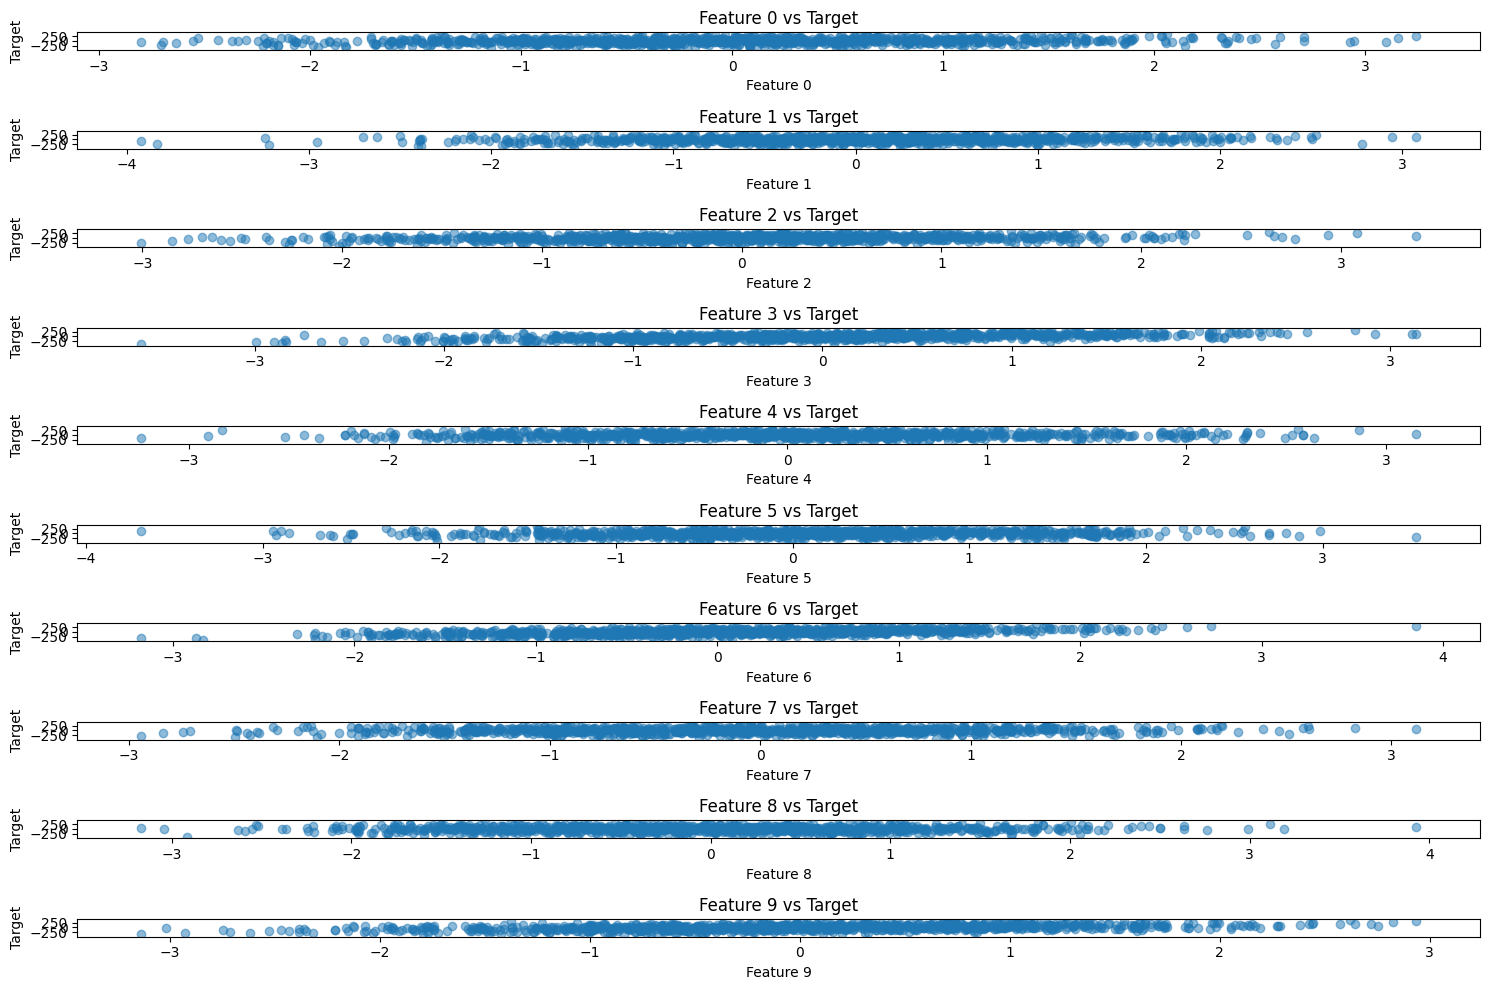

In [454]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X is your feature matrix and y is your target variable

# Plotting scatter plots for each feature against the target variable
num_features = X.shape[1]

plt.figure(figsize=(15, 10))

for i in range(num_features):
    plt.subplot(num_features, 1, i + 1)
    plt.scatter(X[:, i], y, alpha=0.5)
    plt.title(f'Feature {i} vs Target')
    plt.xlabel(f'Feature {i}')
    plt.ylabel('Target')

plt.tight_layout()
plt.show()


In [459]:
data8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            791 non-null    datetime64[ns]
 1   aqi             791 non-null    float64       
 2   visibility      791 non-null    float32       
 3   Avg Humidity    791 non-null    float64       
 4   Max Wind Speed  791 non-null    float64       
 5   Avg Wind Speed  791 non-null    float64       
 6   Avg Temp        791 non-null    float64       
 7   Max Temp        791 non-null    float64       
 8   Min Temp        791 non-null    float64       
 9   pressure_hpa    791 non-null    float64       
 10  year            791 non-null    int32         
 11  month           791 non-null    int32         
 12  day             791 non-null    int32         
 13  weekday         791 non-null    int32         
 14  season          791 non-null    int64         
dtypes: dat

Date              datetime64[ns]
aqi                      float64
visibility               float64
Avg Humidity             float64
Max Wind Speed           float64
Avg Wind Speed           float64
Avg Temp                 float64
Max Temp                 float64
Min Temp                 float64
pressure_hpa             float64
year                       int64
month                      int64
day                        int64
weekday                    int64
season                     int64
dtype: object


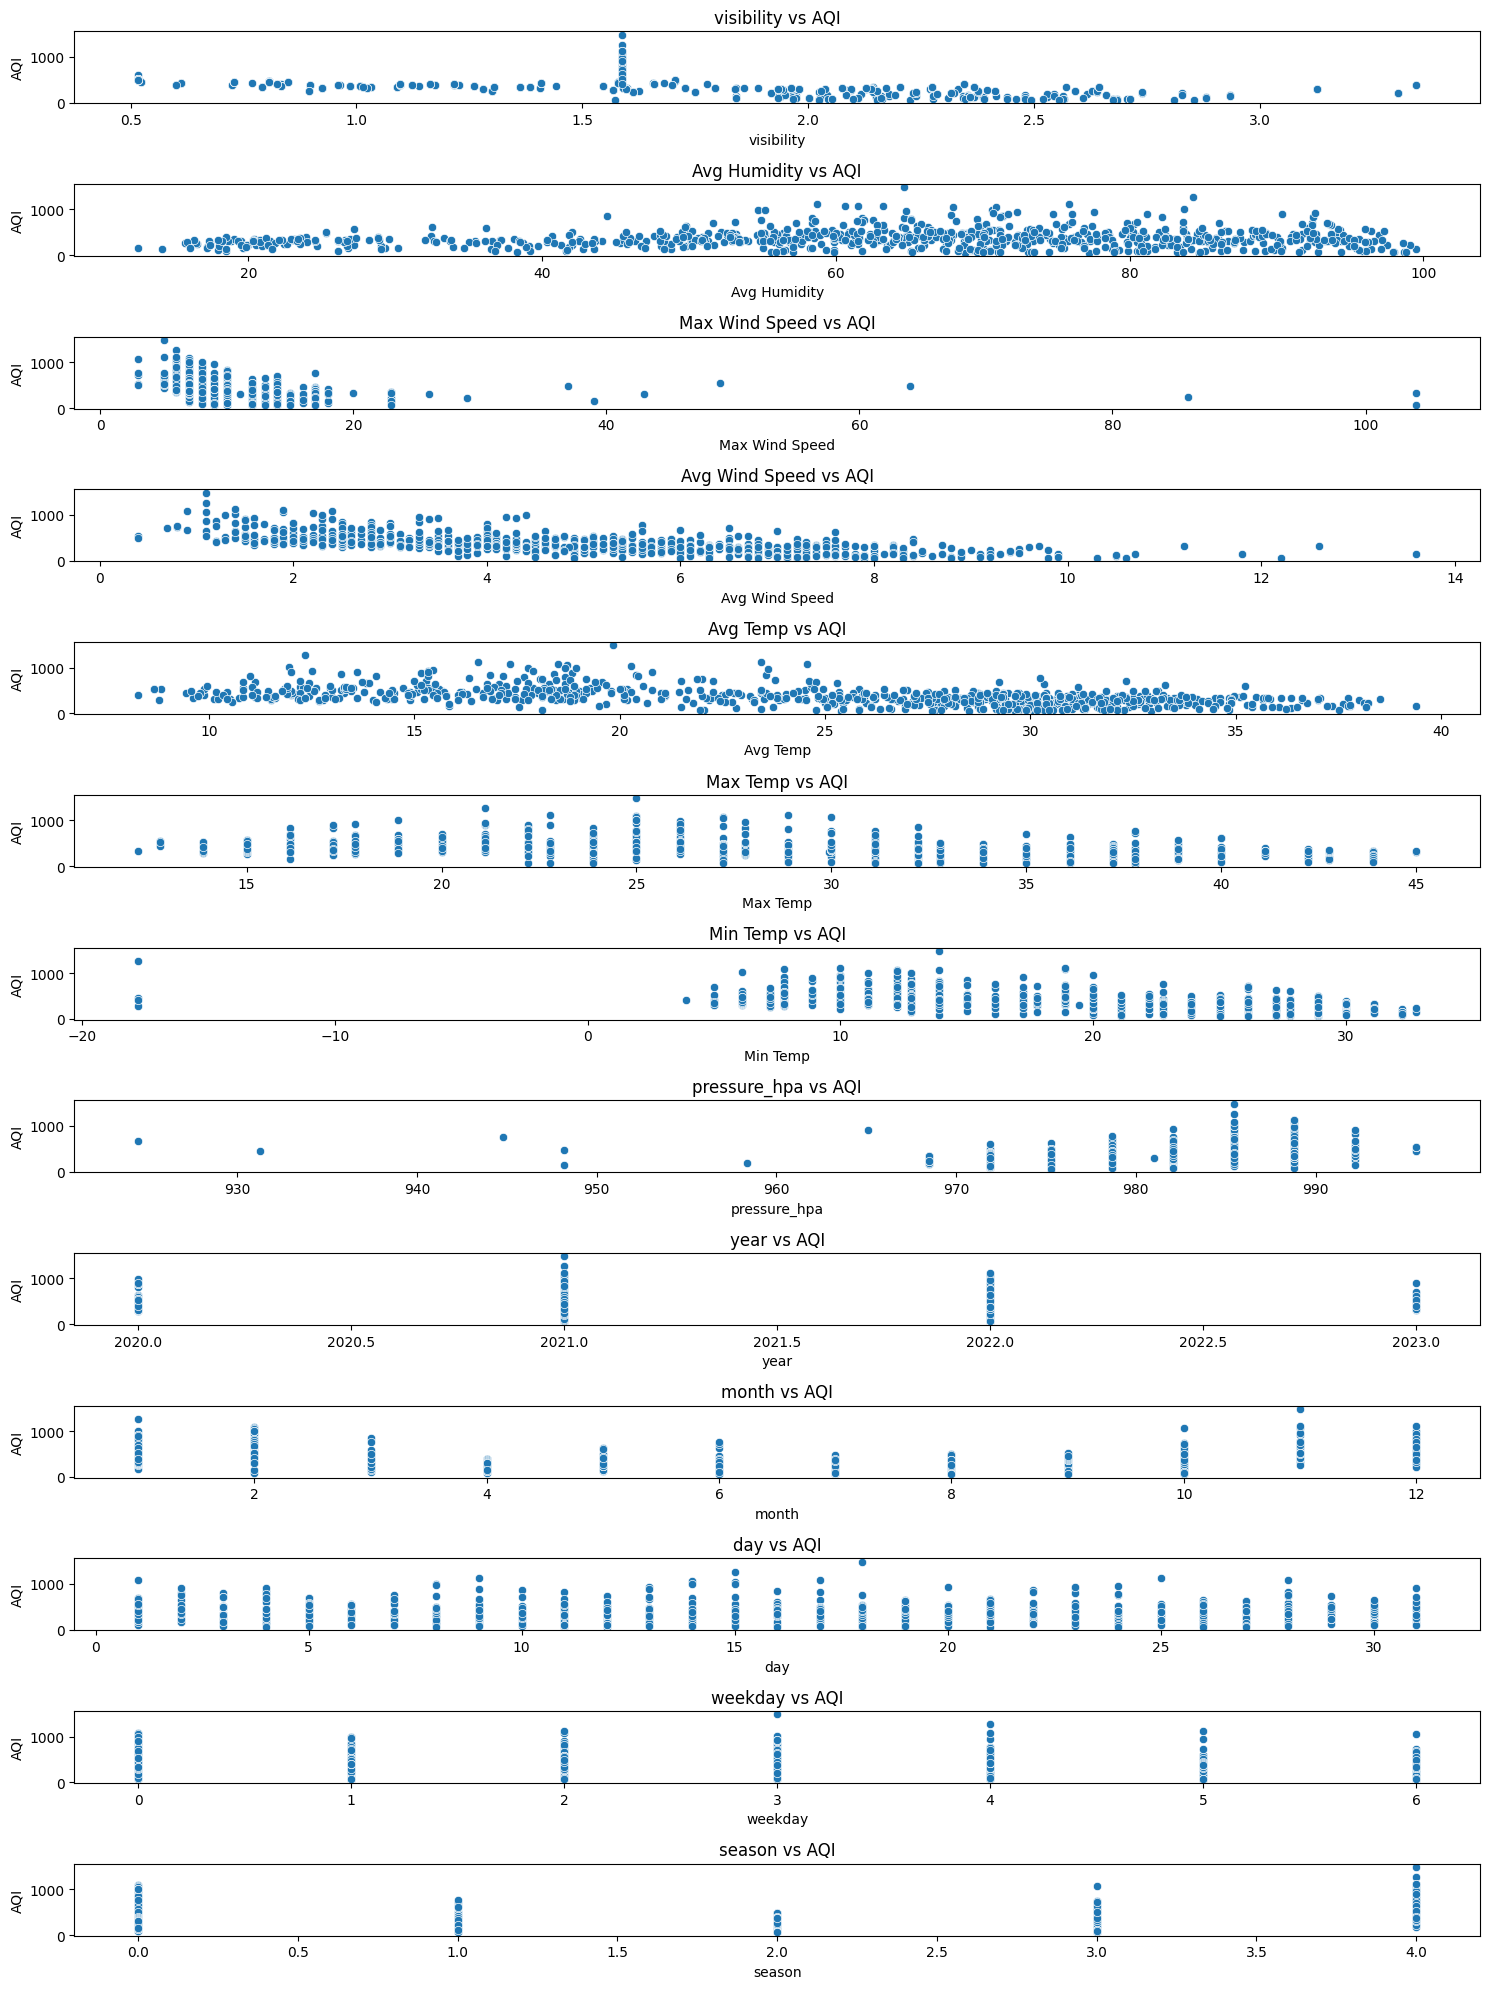

In [460]:
# Convert columns to appropriate data types
df = data8.astype({
    'aqi': 'float',  # or 'int' if you prefer
    'visibility': 'float',
    'Avg Humidity': 'float',
    'Max Wind Speed': 'float',
    'Avg Wind Speed': 'float',
    'Avg Temp': 'float',
    'Max Temp': 'float',
    'Min Temp': 'float',
    'pressure_hpa': 'float',
    'year': 'int',
    'month': 'int',
    'day': 'int',
    'weekday': 'int',
    'season': 'int'
})

# Verify data types after conversion
print(df.dtypes)


features = [
    'visibility',
    'Avg Humidity',
    'Max Wind Speed',
    'Avg Wind Speed',
    'Avg Temp',
    'Max Temp',
    'Min Temp',
    'pressure_hpa',
    'year',
    'month',
    'day',
    'weekday',
    'season'
]

# Create a scatter plot for each feature vs. target
plt.figure(figsize=(15, 20))

for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i + 1)
    sns.scatterplot(data=data8, x=feature, y='aqi')
    plt.title(f'{feature} vs AQI')
    plt.xlabel(feature)
    plt.ylabel('AQI')

plt.tight_layout()
plt.show()